# Time Series Forcasting

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Time Series Forecasting is not a machine learning regression

* Install Prophet

In [1]:
# %pip install Prophet

* Import Packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\HP\1.Myedusolve\3.Machine Learning\Versi Indo\monthly-car-sales.csv")
df.head(10)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


# 1.Data Profiling

Data profiling used to find out information on data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


* see missing values ​​in data

In [5]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

* see missing data type

In [6]:
df.dtypes

Month    object
Sales     int64
dtype: object

Should be for data types in Month should be date or datetime data type

# 2.Data Cleansing

* Change the Month data type from string to datetime

In [7]:
df['Month']=pd.to_datetime(df['Month'])

* change columns name

In [8]:
df.columns=['ds','y']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


# 3.Exploratory Data Analysis (EDA)

* Time series plot

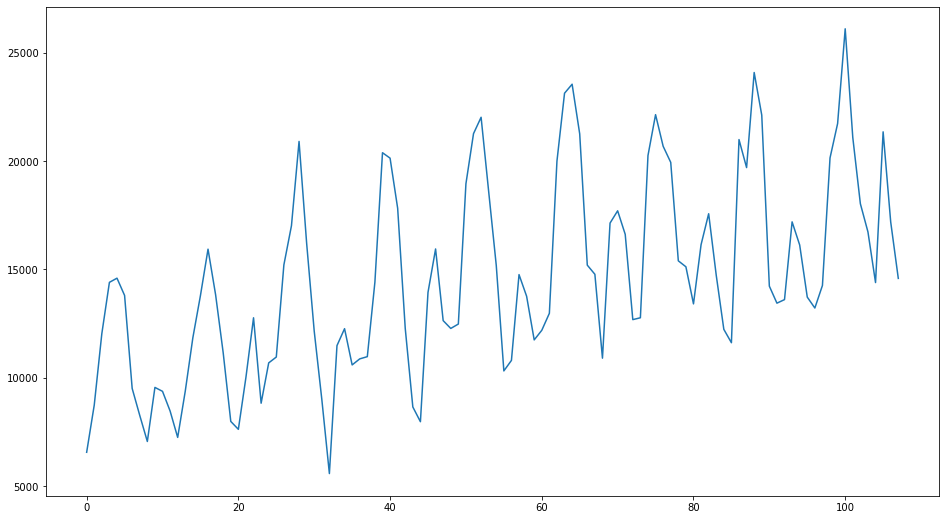

In [10]:
plt.figure(figsize=(16,9))
df['y'].plot()
plt.show()

# 4.Feature Engineering

## 4.1 Preprocessing Modeling

Create training data and testing data

* Train Test

In [11]:
# Feature Selection

In [12]:
train = df.drop(df.index[-12:]) #drop last twelve
test = df.drop(df.index[:-12]) #choose last twelve months

In [13]:
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [14]:
test.head()

,ds,y
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099


In [15]:
x_train = pd.DataFrame(train['ds'])
y_train = pd.DataFrame(train['y'])

In [16]:
x_test = pd.DataFrame(test['ds'])
y_test = pd.DataFrame(test['y'])

# 5.Modelling

Making models using Prophet

In [17]:
model = Prophet()
model.fit(train)

01:20:05 - cmdstanpy - INFO - Chain [1] start processing
01:20:06 - cmdstanpy - INFO - Chain [1] done processing


Make predictions from testing data

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17591.493764,12996.734851,16077.852457,17591.386779,17591.694587,-3078.509368,-3078.509368,-3078.509368,-3078.509368,-3078.509368,-3078.509368,0.0,0.0,0.0,14512.984397
1,1968-02-01,17639.350206,13403.617398,16492.647041,17637.649451,17641.144495,-2708.444577,-2708.444577,-2708.444577,-2708.444577,-2708.444577,-2708.444577,0.0,0.0,0.0,14930.905629
2,1968-03-01,17684.119135,19342.114922,22410.541959,17679.697222,17688.076434,3158.057036,3158.057036,3158.057036,3158.057036,3158.057036,3158.057036,0.0,0.0,0.0,20842.176172
3,1968-04-01,17731.975577,21543.708056,24424.405540,17723.161597,17738.960213,5268.703554,5268.703554,5268.703554,5268.703554,5268.703554,5268.703554,0.0,0.0,0.0,23000.679131
4,1968-05-01,17778.288263,21756.950921,24857.516521,17765.166953,17789.070108,5571.868897,5571.868897,5571.868897,5571.868897,5571.868897,5571.868897,0.0,0.0,0.0,23350.157159


In [20]:
yhat = y_pred['yhat'].values

In [21]:
yhat

array([14512.98439689, 14930.90562927, 20842.17617187, 23000.67913103,
       23350.15715933, 20972.26825767, 17359.53927678, 14785.20570325,
       13521.40595927, 17058.06396199, 17418.70122152, 15808.94518601])

# 6.Evaluate Model

Calculate MAPE model

In [22]:
MAPE = mean_absolute_percentage_error(y_test, yhat)
MAPE

0.07187183098630123